# Average colour

One application of Monte Carlo is global illumination in computer graphics. 
The basic idea is that shaded areas in scenes are not black, but instead have colour due to indirect illumination. See especially the first 5 pages of
[this](https://cgg.mff.cuni.cz/~jaroslav/papers/2008-irradiance_caching_class/02-jk-gi.pdf)
([This](https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-837-computer-graphics-fall-2012/lecture-notes/MIT6_837F12_Lec18.pdf) and
[this](https://cg.iit.bme.hu/~szirmay/script.pdf) also discuss the topic. The live lecture may also help in understanding the point of this notebook.)

We imagine that light from different directions illuminates a point $p$. One will see the colour of $p$ as the average colour of the indirect light from different directions. It would be far too complex to treat a realistic problem of this type, but we can get a flavour of this with a simple calculation of the average colour. Rather than averaging over different directions, we will content ourselves with averaging over different positions within a square scene.

Matplotlib can [specify a colour](https://matplotlib.org/3.1.0/tutorials/colors/colors.html)
in terms of [RGB](https://en.wikipedia.org/wiki/RGB_color_model)
(red, green, blue) float values in $[0, 1]$, e.g., $(1.0, 0.0, 0.0)$ is red, $(0.0, 0.0, 1.0)$ is blue, $(1,1,1)$ is white. We will find average colour by computing the mean RGB values.  The colours in our scene are given in terms of a function that returns RGB values at each position $(x,y)$. 

Finding the average colour over the unit square via Monte Carlo is simple:
- Generate a uniform random sample of points $(x,y)$ in the square.
- Evaluate the colour at each sample point by calling the function to get the associated RGB values. 
- Compute the mean of each component to obtain the average colour.



In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

---

### RGB values

Before considering the Monte Carlo calculation, we first illustrate the use of colour. We plot large points at various locations around a square with colours specified by their RGB values. 

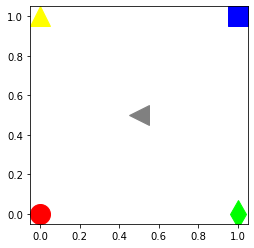

In [2]:
R, G, B = 1, 0, 0
plt.plot(0.0, 0.0, 'o', markersize = 20, color = (R, G, B))

plt.plot(1.0, 0.0, 'd', markersize = 20, color = (0, 1, 0))

plt.plot(1.0, 1.0, 's', markersize = 20, color = (0, 0, 1))

plt.plot(0.0, 1.0, '^', markersize = 20, color = (1, 1, 0))

plt.plot(0.5, 0.5, '<', markersize = 20, color = (0.5, .5, .5))

plt.axis("square")
plt.show()

As you can guess, the Keyword argument `color = (R, G, B)` sets the colour of the plotted point. In the first case we define variables, R, G, and B. In the other cases we do not. 

Note: green given by $(0,1,0)$ shows up badly on many screens. A better green is (0, 0.75, 0). Try it. 
Also, if you want to play with colours, try changing some. Each value of R, G and B must be in $[0,1]$. 

---

### RGB as function of (x,y)

We define a Python function returning RGB values determined by position (x,y). This function defines the colours in our scene. You need not worry about the particular form we use. Change it later as you wish, as long as the R, G, and B values stay within $[0,1]$. Note that all the computations will work elementwise, so if `x` and `y` are arrays, then `R`, `G` and `B` will also be returned as arrays.


In [4]:
# Define the function returning RGB values as a function of position (x,y).

def my_RGB(x, y):
    xt = x - 0.4*np.sin(2*np.pi*y**2)
    R = np.sin(np.pi*xt)**2
    G = np.cos(np.pi*xt)**8
    B = 0.8
    return R, G, B

### Visualising the scene

The next code cell is for visualising the colours in the square scene. It is not for computing the average colour. By sampling and plotting a relatively large number of points and plotting the points with the corresponding RGB colour values, we can see what the scene looks like. (**This cell may take some time to execute. Just wait for it.**)

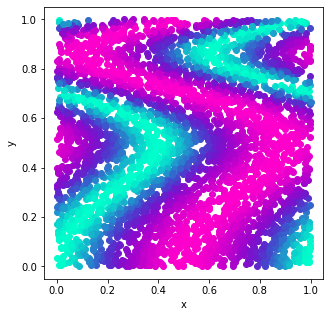

In [5]:
# Use Monte Carlo sampling to visualise the scene.

N = 4000
x = np.random.uniform(0, 1, N)
y = np.random.uniform(0, 1, N)

fig = plt.figure(figsize=(5,5))
for i in range(N):
    R, G, B = my_RGB(x[i], y[i])
    plt.plot(x[i], y[i], 'o', color = (R, G, B))

plt.xlabel("x")
plt.ylabel("y")
plt.show()


---

### Average colour

Use Monte Carlo to calculate and print the mean colour. 

In [6]:
# This cell calculates and prints the mean colour using Monte Carlo.

# generate N uniformly distributed random points in the unit square
N = 4000
x = np.random.uniform(0, 1, N)
y = np.random.uniform(0, 1, N)

# since my_RGB works elementwise, we can return red, green and blue arrays
R, G, B = my_RGB(x, y)

# compute the mean of each colour
R_mean = np.mean(R)
G_mean = np.mean(G)
B_mean = np.mean(B)

# print the means
print(R_mean, G_mean, B_mean)

0.5027932726193476 0.2728756846814458 0.8


Note that in the above cell we exploited that `my_RGB` is able to accept arrays `x` and `y` and return the corresponding colours as three arrays `R`, `G` and `B`. 

**Exercise:** Insert statements into the cell above to print the shapes of `x`, `y`, `R`, `G` and `B`. You should understand that there are `N` points. Each point has two coordinate specifiying its position and three values specifying its colour. 

---

### Average colour as function of sample size

This is the interesting part. The cell below uses Monte Carlo to calculate the average colour of our scene for a variety of sample sizes `N`. It plots a small square with the average colour for each `N`. The small squares are like those one sees for choosing paint. (We would not ask you to write such code from scratch, but you should be able to understand it.)

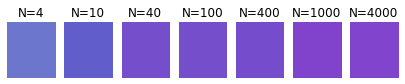

In [7]:
# This cell calculates the mean colour using Monte Carlo for a variety
# of sample sizes, and it plots the mean colour for each.

# Set the sample sizes N to consider
N_values = [4, 10, 40, 100, 400, 1000, 4000]

# This gives us the number of cases we will run
N_cases = len(N_values)

# Set the figure size based on the number of cases
fig = plt.figure(figsize=(N_cases,1))

# Run Monte Carlo for each case
case = 1
for N in N_values:
    
    # random samples
    x = np.random.uniform(0, 1, N)
    y = np.random.uniform(0, 1, N)

    # mean colour for this sample
    red, green, blue = my_RGB(x, y)
    red_mean = np.mean(red)
    green_mean = np.mean(green)
    blue_mean = np.mean(blue)
    
    # plot a square with the mean colour
    plt.subplot(1,N_cases,case)
    plt.plot(0.5, 0.5, 's', markersize=300, color = (red_mean,green_mean,blue_mean))
    plt.axis('off')
    plt.title("N="+str(N))
    case += 1
    
plt.show()

You should first re-run the cell a few times because the colours for small sample sizes will vary each time.

**Exercise:** For what value of `N` is the average colour first "close enough" to the value at 4000? (We will take `N=4000` to be the true mean colour.) People perceive colours differently and people will have different opinions on what is "close enough", but most people will choose a rather small sample size. 

Whatever value of `N` you decide is close enough, go back to the cell that uses "Monte Carlo sampling to visualise the scene" and set `N` to that value. Run the cell. You will see how a sparse sample of points, too sparse to convey what the scene looks like, is nevertheless sufficient to capture the average colour. Monte Carlo is very effective at such calculations.

---

**Exercise:** There is no real exercise here, but feel free to play with the `my_RBG` function and try different functions for the colours. You must keep them in $[0,1]$. 